##Challenge 1

In [19]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from scipy.stats import mode
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, roc_curve, auc

%matplotlib inline


pd.options.mode.chained_assignment = None

headers = ['party', 'handicapped_infants', 'water_project_cost_sharing',
    'adoption_of_the_budget_resolution', 'physician_fee_freeze', 'el_salvador_aid',
    'religious_groups_in_schools', 'anti_satellite_test_ban', 'aid_to_nicaraguan_contras',
    'mx_missile', 'immigration', 'synfuels_corporation_cutback','education_spending',
    'superfund_right_to_sue', 'crime', 'duty_free_exports', 'export_administration_act_south_africa']

# read in data -- NOTE: has no headers
data = pd.read_csv("~/Desktop/metis/challenge_4/house-votes-84.csv", header=None,
    names=headers)

#change yes to 1, no to 0, ? to nan
data[data=='y'] = float(1)
data[data=='n'] = float(0)
data[data=='?'] = np.nan
#fill in nan with avg of column, then round to 0 or 1
new = data.ix[:, 'handicapped_infants':].apply(lambda x: x.fillna(x.mean()), axis=0)
new[new < .5] = float(0)
new[new >= .5] = float(1)
new['party'] = data['party'].apply(lambda x: 1 if x == 'republican' else 0)


In [20]:
def split_data(data):
    """
    @param -> data : pandas DataFrame
    @return -> train, test : split into 2 pandas DFs with NO HEADERS
    """
    train, test = train_test_split(data)
    train = pd.DataFrame(train)
    test = pd.DataFrame(test)
    return train, test

train, test = split_data(new)

In [31]:
#KNN
train_X = train.ix[:, :15]
train_y = train.ix[:, 16]
test_X = test.ix[:, :15]
test_y = test.ix[:, 16]


knn_3 = KNeighborsClassifier(n_neighbors=10)
knn_3.fit(train_X, train_y)
knn_result_prob = knn_3.predict_proba(test_X)
knn_result = knn_3.predict(test_X)
print accuracy_score(test_y, knn_result)


# precision, recall, fscore, support = precision_recall_fscore_support(test_y, results)
# print precision, recall, fscore, support
print precision_recall_fscore_support(test_y, knn_result)

logit = LogisticRegression()
logit.fit(train_X, train_y)
logit_result_prob = logit.predict_proba(test_X)
logit_result = logit.predict(test_X)
logit_accuracy = accuracy_score(test_y, logit_result)
print logit_accuracy
print precision_recall_fscore_support(test_y, logit_result)


0.935779816514
(array([ 0.98333333,  0.87755102]), array([ 0.90769231,  0.97727273]), array([ 0.944     ,  0.92473118]), array([65, 44]))
0.954128440367
(array([ 0.98387097,  0.91489362]), array([ 0.93846154,  0.97727273]), array([ 0.96062992,  0.94505495]), array([65, 44]))


##Challenge 2

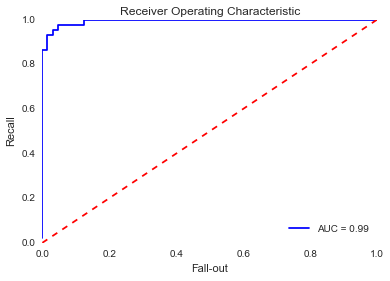

In [36]:
false_positive_rate, recall, thresholds = roc_curve(test_y, logit_result_prob[:,1])
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

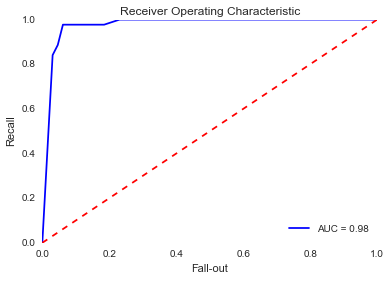

In [37]:
false_positive_rate, recall, thresholds = roc_curve(test_y, knn_result_prob[:,1])
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

##Challenge 3

In [46]:
print "KNN results: "
print "precision " + str(np.mean(cross_val_score(knn_3, new.ix[:, :15], new.ix[:, 16], scoring='precision')))
print "recall " + str(np.mean(cross_val_score(knn_3, new.ix[:, :15], new.ix[:, 16], scoring='recall')))
print "accuracy " + str(np.mean(cross_val_score(knn_3, new.ix[:, :15], new.ix[:, 16], scoring='accuracy')))
print "f1 " + str(np.mean(cross_val_score(knn_3, new.ix[:, :15], new.ix[:, 16], scoring='f1')))

KNN results: 
precision 0.886368898768
recall 0.928571428571
accuracy 0.926436781609
f1 0.906704446922


In [49]:
print "Logit results: "
print "precision " + str(np.mean(cross_val_score(logit, new.ix[:, :15], new.ix[:, 16], scoring='precision')))
print "recall " + str(np.mean(cross_val_score(logit, new.ix[:, :15], new.ix[:, 16], scoring='recall')))
print "accuracy " + str(np.mean(cross_val_score(logit, new.ix[:, :15], new.ix[:, 16], scoring='accuracy')))
print "f1 " + str(np.mean(cross_val_score(logit, new.ix[:, :15], new.ix[:, 16], scoring='f1'))) 

Logit results: 
precision 0.954195804196
recall 0.946428571429
accuracy 0.96091954023
f1 0.949483966725


##Challenge 4

In [50]:
data = pd.read_csv("~/Desktop/metis/challenge_4/2013_movies.csv")
data = data.dropna(subset=['Rating'])
data = data[['Budget','DomesticTotalGross', 'Runtime', 'Rating']]
data = data.convert_objects(convert_numeric=True)
data = data.dropna()

tr_mov, ts_mov = split_data(data)

tr_mov_X = tr_mov.iloc[:,0:2]
ts_mov_X = ts_mov.iloc[:,0:2]
tr_mov_y = tr_mov.loc[:, 3]
ts_mov_y = ts_mov.loc[:, 3]


#predict genres using Logit
logit = LogisticRegression()
logit.fit(tr_mov_X, tr_mov_y)
result = logit.predict(ts_mov_X)
logit_accuracy = accuracy_score(ts_mov_y, result)
print 'Logistic Regression Accuracy: ' + str(logit_accuracy)

#predict genres using KNN, n=10
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(tr_mov_X, tr_mov_y)
result = knn.predict(ts_mov_X)
knn_accuracy = accuracy_score(ts_mov_y, result)
print 'KNN Accuracy: ' + str(knn_accuracy)

Logistic Regression Accuracy: 0.391304347826
KNN Accuracy: 0.434782608696


In [52]:
print "Logit results: "
print "precision " + str(np.mean(cross_val_score(logit, data.ix[:, :2], data.ix[:, 3], scoring='precision')))
print "recall " + str(np.mean(cross_val_score(logit, data.ix[:, :2], data.ix[:, 3], scoring='recall')))

Logit results: 
precision 0.473361380073
recall 0.538697318008


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/metrics/metrics.py:1771: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


##Challenge 5

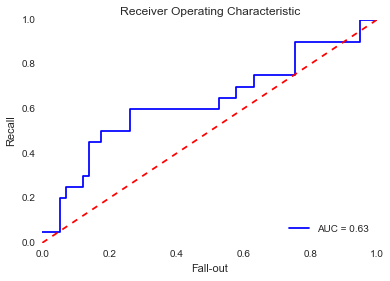

In [56]:
haberman = pd.read_csv("~/Desktop/metis/challenge_4/haberman.csv", header=None)
headers = ['age_patient', 'year_operation', 'pos_nodes', 'survival_status']
d = dict(zip(range(0,4), headers))
haberman.rename(columns=d, inplace=True)
haberman['survival_status'] = haberman['survival_status'].apply(lambda x: 1 if x == 2 else 0)

train, test = split_data(haberman)

train_X = train.ix[:, :2]
train_y = train.ix[:, 3]
test_X = test.ix[:, :2]
test_y = test.ix[:, 3]

#use logistic regression to predict 
logit = LogisticRegression()
logit.fit(train_X, train_y)
result = logit.predict(test_X)
result_prob = logit.predict_proba(test_X)
logit_accuracy = accuracy_score(test_y, result)

false_positive_rate, recall, thresholds = roc_curve(test_y, result_prob[:,1])
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()